# 1. Data Mining

## 1.1. Downloading the data

In [4]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps, summary_fields
import pandas as pd

API = "05pwL0aLyXiEGNsZRFhKcju39mwEqbz8"

necessary_field = ['material_id', 'formula_pretty','formula_anonymous', 'structure','chemsys', 'is_metal']
wanted_field = summary_fields['elasticity'] # we want to find the Elasticity field
wanted_properties = [HasProps.elasticity] # we want to find the Elasticity properties

with MPRester(API) as mpr:
    docs = mpr.materials.summary.search(
        has_props = wanted_properties, fields=necessary_field+wanted_field
    )

/home/3552b737-f90f-4109-be75-4182f04db0a0/.conda/envs/materials/lib/python3.11/site-packages/mpcontribs/client/__init__.py:90: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


Retrieving SummaryDoc documents:   0%|          | 0/7108 [00:00<?, ?it/s]

## 1.2. Converting to dataframe

In [5]:
# Converting the data raw data into dataframe
materials = []
for material in docs:
  material = dict(material)
  materials.append(material)
df = pd.DataFrame(materials)
df = df[necessary_field+wanted_field]
df.head()

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson
0,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188
1,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882
2,mp-4681,NaNbO3,ABC3,"[[4.20260404 1.39920548 3.89533631] Na, [1.327...",Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833
3,mp-754318,MnZnO3,ABC3,"[[3.95082517 2.08508966 1.43046292] Mn, [7.634...",Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650
4,mp-555064,Cd(CO2)2,AB2C4,"[[0. 0. 0.] Cd, [2.705942 1.784278 2.763274] C...",C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333


## 1.3. Converting the structure to cif string and saving it.

In [6]:
from pymatgen.io.cif import CifWriter
structure_cif = []
for index, row in df.iterrows():
    structure = row["structure"]
    cif_writer = CifWriter(structure)
    cif_string = cif_writer.__str__()
    structure_cif.append(cif_string)

df['structure_cif']=structure_cif

# Save the DataFrame to an Excel file
df.to_csv("Database/DataBase.csv", index=False)

No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.


## 1.4. Opening the data

In [155]:
# Read the CSV file and create a DataFrame
df_loaded = pd.read_csv('Database/DataBase.csv')

# Display the loaded DataFrame
df_loaded.head()

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,structure_cif
0,mp-5784,Na2GeO3,AB2C3,Full Formula (Na4 Ge2 O6)\nReduced Formula: Na...,Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,# generated using pymatgen\ndata_Na2GeO3\n_sym...
1,mp-23004,CsMgCl3,ABC3,Full Formula (Cs2 Mg2 Cl6)\nReduced Formula: C...,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,# generated using pymatgen\ndata_CsMgCl3\n_sym...
2,mp-4681,NaNbO3,ABC3,Full Formula (Na4 Nb4 O12)\nReduced Formula: N...,Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,# generated using pymatgen\ndata_NaNbO3\n_symm...
3,mp-754318,MnZnO3,ABC3,Full Formula (Mn2 Zn2 O6)\nReduced Formula: Mn...,Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,# generated using pymatgen\ndata_MnZnO3\n_symm...
4,mp-555064,Cd(CO2)2,AB2C4,Full Formula (Cd2 C4 O8)\nReduced Formula: Cd(...,C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...


In [172]:
df_loaded.dtypes

material_id              object
formula_pretty           object
formula_anonymous        object
structure                object
chemsys                  object
is_metal                   bool
k_voigt                 float64
k_reuss                 float64
k_vrh                   float64
g_voigt                 float64
g_reuss                 float64
g_vrh                   float64
universal_anisotropy    float64
homogeneous_poisson     float64
structure_cif            object
dtype: object

## 1.5. Testing accessing the cif parser

In [22]:
from pymatgen.io.cif import CifParser
from ase import Atoms
import numpy as np

atoms = {}
for n,cif in enumerate(np.array(df['structure_cif'])):
    parser = CifParser.from_string(cif)
    structure = parser.get_structures()
    structure = structure[0]
    atom = Atoms(pbc=True, cell=structure.lattice.matrix,
                positions=structure.cart_coords, numbers=structure.atomic_numbers)
    
    label = f"atoms {n}"
    atoms[label] = atom

`from_string` is deprecated!
Use from_str instead
Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 8 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 16 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 18 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 6 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 5 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 24 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 32 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 10 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 20 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 3 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 14 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 15 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 7 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Issues encountered while parsing CIF: 48 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 9 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 58 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 36 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 28 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 13 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 54 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 74 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Issues encountered while parsing CIF: 40 fractional coordinates rounded to ideal values to avoid issues with finite precision.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## 1.6. Testing acessing the structure data for matminer (Not working)

In [261]:
from matminer.featurizers.conversions import DictToObject

dto = DictToObject(target_col_id='structure', overwrite_data=True)
df_loaded = dto.featurize_dataframe(df_loaded, 'structure')
df_loaded.head()

DictToObject:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,structure_cif,structure
0,mp-5784,Na2GeO3,AB2C3,Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,# generated using pymatgen\ndata_Na2GeO3\n_sym...,Full Formula (Na4 Ge2 O6)\nReduced Formula: Na...
1,mp-23004,CsMgCl3,ABC3,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,# generated using pymatgen\ndata_CsMgCl3\n_sym...,Full Formula (Cs2 Mg2 Cl6)\nReduced Formula: C...
2,mp-4681,NaNbO3,ABC3,Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,# generated using pymatgen\ndata_NaNbO3\n_symm...,Full Formula (Na4 Nb4 O12)\nReduced Formula: N...
3,mp-754318,MnZnO3,ABC3,Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,# generated using pymatgen\ndata_MnZnO3\n_symm...,Full Formula (Mn2 Zn2 O6)\nReduced Formula: Mn...
4,mp-555064,Cd(CO2)2,AB2C4,C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,Full Formula (Cd2 C4 O8)\nReduced Formula: Cd(...


# 2. Descriptors

## 2.1. Formula Descriptors

In [163]:
# Str to composition descriptor
from matminer.featurizers.conversions import StrToComposition

df_formula = df.copy()

df_formula = StrToComposition().featurize_dataframe(df_formula, "formula_pretty")
df_formula.head()

StrToComposition:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,structure_cif,composition
0,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,# generated using pymatgen\ndata_Na2GeO3\n_sym...,"(Na, Ge, O)"
1,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,# generated using pymatgen\ndata_CsMgCl3\n_sym...,"(Cs, Mg, Cl)"
2,mp-4681,NaNbO3,ABC3,"[[4.20260404 1.39920548 3.89533631] Na, [1.327...",Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,# generated using pymatgen\ndata_NaNbO3\n_symm...,"(Na, Nb, O)"
3,mp-754318,MnZnO3,ABC3,"[[3.95082517 2.08508966 1.43046292] Mn, [7.634...",Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,# generated using pymatgen\ndata_MnZnO3\n_symm...,"(Mn, Zn, O)"
4,mp-555064,Cd(CO2)2,AB2C4,"[[0. 0. 0.] Cd, [2.705942 1.784278 2.763274] C...",C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,"(Cd, C, O)"


In [165]:
# Element Property Descriptor magpie

from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_formula = ep_feat.featurize_dataframe(df_formula, col_id="composition")  # input the "composition" column to the featurizer
df_formula.head()

ElementProperty:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,...,0.00000,0.000000,0.000000,0.0,12.0,229.0,217.0,119.833333,107.833333,12.0
1,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,...,0.00000,0.000000,0.000000,0.0,64.0,229.0,165.0,123.000000,70.800000,64.0
2,mp-4681,NaNbO3,ABC3,"[[4.20260404 1.39920548 3.89533631] Na, [1.327...",Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,...,0.00000,0.000000,0.000000,0.0,12.0,229.0,217.0,98.800000,104.160000,12.0
3,mp-754318,MnZnO3,ABC3,"[[3.95082517 2.08508966 1.43046292] Mn, [7.634...",Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,...,0.00031,0.000062,0.000099,0.0,12.0,217.0,205.0,89.400000,92.880000,12.0
4,mp-555064,Cd(CO2)2,AB2C4,"[[0. 0. 0.] Cd, [2.705942 1.784278 2.763274] C...",C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,...,0.00000,0.000000,0.000000,0.0,12.0,194.0,182.0,90.000000,89.142857,12.0


## 2.3. Structure Descriptors

In [24]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)

In [25]:
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    MaximumPackingEfficiency(),
    SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
    StructureComposition(Stoichiometry()),
    StructureComposition(ElementProperty.from_preset("magpie")),
    StructureComposition(ValenceOrbital(props=['frac'])),
    StructureComposition(IonProperty(fast=True))
])

In [218]:
df_loaded.head()

DictToObject:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,structure_cif,structure
0,mp-5784,Na2GeO3,AB2C3,Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,# generated using pymatgen\ndata_Na2GeO3\n_sym...,Full Formula (Na4 Ge2 O6)\nReduced Formula: Na...
1,mp-23004,CsMgCl3,ABC3,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,# generated using pymatgen\ndata_CsMgCl3\n_sym...,Full Formula (Cs2 Mg2 Cl6)\nReduced Formula: C...
2,mp-4681,NaNbO3,ABC3,Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,# generated using pymatgen\ndata_NaNbO3\n_symm...,Full Formula (Na4 Nb4 O12)\nReduced Formula: N...
3,mp-754318,MnZnO3,ABC3,Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,# generated using pymatgen\ndata_MnZnO3\n_symm...,Full Formula (Mn2 Zn2 O6)\nReduced Formula: Mn...
4,mp-555064,Cd(CO2)2,AB2C4,C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,Full Formula (Cd2 C4 O8)\nReduced Formula: Cd(...


In [246]:
test_df = df_loaded.copy()
test_df = test_df.iloc[:3,:]
structure = featurizer.featurize_many(test_df['structure'], ignore_errors=True)

MultipleFeaturizer:   0%|          | 0/3 [00:00<?, ?it/s]

In [201]:
import csv

# Sample data
data = [[1, 2, 3, ..., 273],  # Row 1
        [4, 5, 6, ..., 276],  # Row 2
        [28, 29, 30, ..., 300]]  # Row 10

# Save data as a CSV file
filename = 'data.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"Data saved as {filename}")

Data saved as data.csv


# 3. Deep Learning

## 3.1. Package import

In [124]:
import tensorflow as tf
import json
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2023-10-20 03:35:26.207529: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-20 03:35:26.875069: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-20 03:35:26.875097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-20 03:35:26.878697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 03:35:27.506617: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-20 03:35:27.510863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## 3.2. Formula training

### 3.2.1. Formula data

In [275]:
feat_col_formula = np.array(df_formula.columns[16:])

dataset_formula = df_formula.copy()

dataset_formula = dataset_formula.dropna() # Delete all NaN value
train_formula = dataset_formula.sample(frac=0.8, random_state=0)
test_formula = dataset_formula.drop(train_formula.index)

# Types of labels
train_labels_formula = train_formula.pop('k_voigt')
test_labels_formula = test_formula.pop('k_voigt')

# Datasets
train_dataset_formula = train_formula[feat_col_formula]
test_dataset_formula = test_formula[feat_col_formula]

In [282]:
# Convertion

feat_col = feat_col_formula

# Types of labels
train_labels = train_labels_formula
test_labels = test_labels_formula

# Datasets
train_dataset = train_dataset_formula
test_dataset = test_dataset_formula

In [284]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

model = tf.keras.Sequential([
        input_layer,
        normalizer,
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(
    np.array(train_dataset),
    np.array(train_labels),
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    batch_size=32
)

loss = history.history['val_loss'][-1]

Epoch 1/10
143/143 [==============================] - 1s 3ms/step - loss: 108.1767 - val_loss: 111.1464
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 103.2361 - val_loss: 105.2058
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: 95.2458 - val_loss: 95.7575
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 85.5689 - val_loss: 85.6827
Epoch 5/10
143/143 [==============================] - 0s 2ms/step - loss: 75.9428 - val_loss: 75.5410
Epoch 6/10
143/143 [==============================] - 0s 2ms/step - loss: 66.6172 - val_loss: 66.0167
Epoch 7/10
143/143 [==============================] - 0s 2ms/step - loss: 58.1750 - val_loss: 58.1724
Epoch 8/10
143/143 [==============================] - 0s 2ms/step - loss: 51.5555 - val_loss: 52.3481
Epoch 9/10
143/143 [==============================] - 0s 2ms/step - loss: 46.6698 - val_loss: 48.0283
Epoch 10/10
143/143 [==============================] - 0s 2ms/step - loss: 43.

In [287]:
# Define a list of different numbers of neurons and hidden layers
neurons = [8, 16, 32, 64, 128, 256]
hid_layers = [0, 1, 2, 3, 4, 5, 6]

# Create an empty dictionary to store the results
results = {}

# Create a function to build and train the model with given parameters
def build_and_train_model(num_neurons, num_hidden_layers):
    # Define the input layer with the appropriate input shape
    input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

    # Initialize a list to store the hidden layers
    hidden_layers = []

    # Create the hidden layers
    for _ in range(num_hidden_layers):
        hidden_layers.append(tf.keras.layers.Dense(num_neurons, activation='relu'))

    # Define the model
    model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    # Train the model
    history = model.fit(
        np.array(train_dataset),
        np.array(train_labels),
        epochs=10,
        verbose=0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
        batch_size=32
    )

    # Extract the final validation loss
    loss = history.history['val_loss'][-1]

    return loss

# Iterate through the number of hidden layers first
for num_hidden_layers in hid_layers:
    # Create a dictionary for the results of this number of hidden layers
    results[num_hidden_layers] = {}
    
    # Iterate through the different numbers of neurons
    for num_neurons in neurons:
        loss = build_and_train_model(num_neurons, num_hidden_layers)
        results[num_hidden_layers][num_neurons] = loss

In [288]:
# Print the results
for num_hidden_layers, neurons_loss in results.items():
    print(f'Hidden Layers: {num_hidden_layers}')
    for num_neurons, loss in neurons_loss.items():
        print(f'  Neurons: {num_neurons}, Final Validation Loss: {loss}')

Hidden Layers: 0
  Neurons: 8, Final Validation Loss: 34.535831451416016
  Neurons: 16, Final Validation Loss: 33.35469055175781
  Neurons: 32, Final Validation Loss: 34.50836944580078
  Neurons: 64, Final Validation Loss: 33.8404655456543
  Neurons: 128, Final Validation Loss: 33.40167236328125
  Neurons: 256, Final Validation Loss: 38.37313461303711
Hidden Layers: 1
  Neurons: 8, Final Validation Loss: 30.577056884765625
  Neurons: 16, Final Validation Loss: 29.145736694335938
  Neurons: 32, Final Validation Loss: 26.991464614868164
  Neurons: 64, Final Validation Loss: 28.2562255859375
  Neurons: 128, Final Validation Loss: 34.078941345214844
  Neurons: 256, Final Validation Loss: 39.27141189575195
Hidden Layers: 2
  Neurons: 8, Final Validation Loss: 30.445947647094727
  Neurons: 16, Final Validation Loss: 27.919113159179688
  Neurons: 32, Final Validation Loss: 27.10718536376953
  Neurons: 64, Final Validation Loss: 28.87352180480957
  Neurons: 128, Final Validation Loss: 32.06898

### 3.2.1. Saving results

In [289]:
# Save the results to a JSON file
with open('Results/FormulaResults.json', 'w') as json_file:
    json.dump(results, json_file)

### 3.2.2. Opening the results

In [322]:
# Load the results from the JSON file
with open('Results/FormulaResults1.json', 'r') as json_file:
    results = json.load(json_file)
    
results['0']

{'8': 34.535831451416016,
 '16': 33.35469055175781,
 '32': 34.50836944580078,
 '64': 33.8404655456543,
 '128': 33.40167236328125,
 '256': 38.37313461303711}

In [320]:
# Load the results from the JSON file
with open('Results/FormulaResults2.json', 'r') as json_file:
    results = json.load(json_file)
    
results['0']

{'8': 35.32470703125,
 '16': 35.75016403198242,
 '32': 35.50416564941406,
 '64': 35.71128845214844,
 '128': 38.113521575927734,
 '256': 35.802978515625}

### 3.2.3. Getting the best model

In [324]:
# Initialize variables to track the best model and its loss
best_loss = float('inf')  # Initialize to positive infinity
best_hidden_layers = None
best_neurons = None

# Iterate through the results
for num_hidden_layers, neurons_loss in results.items():
    for num_neurons, loss in neurons_loss.items():
        if loss < best_loss:
            best_loss = loss
            best_hidden_layers = num_hidden_layers
            best_neurons = num_neurons

# Print the best model
print(f'Best Model:')
print(f'  Hidden Layers: {best_hidden_layers}')
print(f'  Neurons: {best_neurons}')
print(f'  Lowest Validation Loss: {best_loss}')

Best Model:
  Hidden Layers: 3
  Neurons: 128
  Lowest Validation Loss: 24.819313049316406


### 3.2.4. Saving the best model

In [331]:
# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

# Initialize a list to store the hidden layers
hidden_layers = []

# Create the hidden layers
for _ in range(int(best_hidden_layers)):
    hidden_layers.append(tf.keras.layers.Dense(int(best_neurons), activation='relu'))

# Define the model
model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(
    np.array(train_dataset),
    np.array(train_labels),
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    batch_size=32
)

model.save("Models/Formula_Layers_Neurons.h5")

Epoch 1/10
143/143 [==============================] - 1s 3ms/step - loss: 39.1547 - val_loss: 40.9265
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 34.3067 - val_loss: 31.5849
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: 31.2568 - val_loss: 31.6647
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 29.6569 - val_loss: 31.1838
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 29.0919 - val_loss: 32.4427
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 27.6723 - val_loss: 27.6658
Epoch 7/10
143/143 [==============================] - 0s 2ms/step - loss: 27.5428 - val_loss: 35.9687
Epoch 8/10
143/143 [==============================] - 0s 2ms/step - loss: 26.2726 - val_loss: 31.5282
Epoch 9/10
143/143 [==============================] - 0s 2ms/step - loss: 25.7446 - val_loss: 25.8308
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 24.6776

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


### 3.2.5. Compare in a test

45/45 [==============================] - 0s 2ms/step


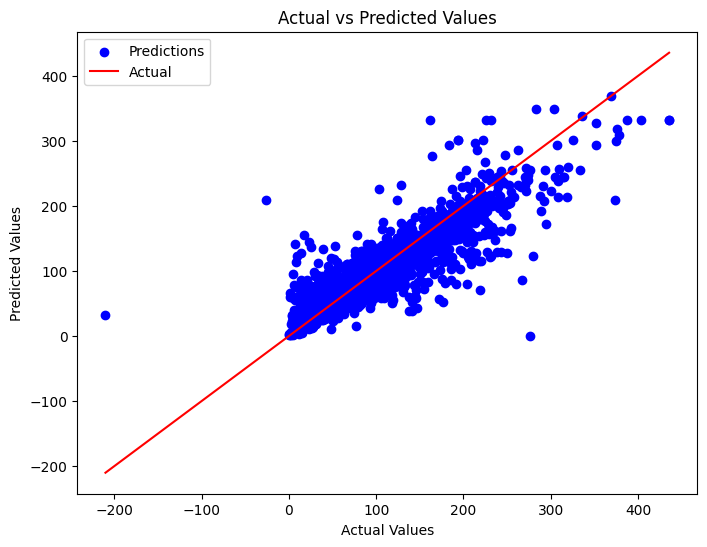

In [333]:
# Load the model
model = tf.keras.models.load_model("Models/Formula_Layers_Neurons.h5")

# Assuming you have a test dataset and corresponding labels
test_predictions = model.predict(test_dataset)

# Assuming you have test labels
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, test_predictions, color='b')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 3.3. Structure training

### 3.3.1. Preparing data

In [9]:
df

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,structure_cif
0,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",Ge-Na-O,False,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,# generated using pymatgen\ndata_Na2GeO3\n_sym...
1,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,Cl-Cs-Mg,False,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,# generated using pymatgen\ndata_CsMgCl3\n_sym...
2,mp-4681,NaNbO3,ABC3,"[[4.20260404 1.39920548 3.89533631] Na, [1.327...",Na-Nb-O,False,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,# generated using pymatgen\ndata_NaNbO3\n_symm...
3,mp-754318,MnZnO3,ABC3,"[[3.95082517 2.08508966 1.43046292] Mn, [7.634...",Mn-O-Zn,False,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,# generated using pymatgen\ndata_MnZnO3\n_symm...
4,mp-555064,Cd(CO2)2,AB2C4,"[[0. 0. 0.] Cd, [2.705942 1.784278 2.763274] C...",C-Cd-O,False,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,mp-27979,LaI3,AB3,"[[2.22761025 3.54695122 2.54029718] La, [1.691...",I-La,False,11.444381,1.554887,6.499634,6.657244,0.672502,3.664873,50.856372,0.262676,# generated using pymatgen\ndata_LaI3\n_symmet...
7104,mp-12087,Cu2S,AB2,"[[-1.388239 -1.388239 -1.388239] Cu, [-4.16471...",Cu-S,True,97.088134,97.088134,97.088134,24.273429,19.766843,22.020136,1.139936,0.394568,# generated using pymatgen\ndata_Cu2S\n_symmet...
7105,mp-1910,CeNi5,AB5,"[[0. 0. 0.] Ce, [-1.21028646 2.09634119 1.97...",Ce-Ni,True,150.814654,150.476494,150.645574,66.427480,64.221904,65.324692,0.173963,0.310566,# generated using pymatgen\ndata_CeNi5\n_symme...
7106,mp-558579,TlHCO2,ABCD2,"[[2.83492351 3.62748997 0.05180387] Tl, [5.871...",C-H-O-Tl,False,8.246527,7.868455,8.057491,4.994321,3.003817,3.999069,3.361341,0.287069,# generated using pymatgen\ndata_TlHCO2\n_symm...


In [63]:
dataset_structure = df.copy()

dataset_structure = dataset_structure.dropna() # Delete all NaN value
train_structure = dataset_structure.sample(frac=0.8, random_state=0)
test_structure = dataset_structure.drop(train_structure.index)


# Types of labels
train_labels_structure = train_structure.pop('k_voigt')
test_labels_structure = test_structure.pop('k_voigt')

In [28]:
train_labels_structure

993     13.761447
859     55.322334
298      5.788232
553    226.533182
672     22.852603
          ...    
117    107.903844
464     15.672628
25     139.089443
110     92.572341
149    158.518355
Name: k_voigt, Length: 800, dtype: float64

In [ ]:
%%time
# Datasets
train_dataset_structure = featurizer.featurize_many(train_structure['structure'], ignore_errors=True)
test_dataset_structure = featurizer.featurize_many(test_structure['structure'], ignore_errors=True)

MultipleFeaturizer:   0%|          | 0/800 [00:00<?, ?it/s]

#### 3.3.1.1. Saving the data

In [49]:
import csv

In [ ]:


# Save data as a CSV file
filename = 'Database/structure_train1000.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(train_dataset_structure)
    
print(f"Data saved as {filename}")

In [ ]:
# Save data as a CSV file
filename = 'Database/structure_test1000.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(test_dataset_structure)

print(f"Data saved as {filename}")

#### 3.3.1.2. Importing the data

In [53]:
import pandas as pd

In [280]:
# Read data from CSV file
filename = 'Database/structure_train.csv'
structure_train = []
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        structure_train.append(row)

In [282]:
# Read data from CSV file
filename = 'Database/structure_test.csv'
structure_test = []
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        structure_test.append(row)

In [284]:
col_names = ["feature" + str(i) for i in range(1,274)]
structure_train = pd.DataFrame(structure_train, columns = col_names)
structure_test = pd.DataFrame(structure_test, columns = col_names)

structure_train = structure_train.assign(label = list(train_labels_structure))
structure_test = structure_test.assign(label = list(test_labels_structure))

structure_train = structure_train.dropna()
structure_test = structure_test.dropna()

structure_train = structure_train[~structure_train.apply(lambda row: (row=='nan').any(), axis=1 )]
structure_test = structure_test[~structure_test.apply(lambda row: (row=='nan').any(), axis=1 )]

In [306]:
train_structure = structure_train[col_names]
test_structure = structure_test[col_names]


# Types of labels
train_labels_structure = structure_train.pop('label')
test_labels_structure = structure_test.pop('label')

### 3.3.2. Perform training

In [316]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
for col in col_names:
    val = train_structure[col][0]
    if is_number(val):
        train_structure[col] = train_structure[col].astype(float)
    else:
        train_structure[col] = train_structure[col].astype(bool)
        train_structure[col] = train_structure[col].astype(float)

In [318]:
for col in col_names:
    val = test_structure[col][0]
    if is_number(val):
        test_structure[col] = test_structure[col].astype(float)
    else:
        test_structure[col] = test_structure[col].astype(bool)
        test_structure[col] = test_structure[col].astype(float)

In [320]:
# Convertion

feat_col = col_names

# Types of labels
train_labels = train_labels_structure
test_labels = test_labels_structure

# Datasets
train_dataset = train_structure
test_dataset = test_structure

In [228]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

model = tf.keras.Sequential([
        input_layer,
        normalizer,
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(
    np.array(train_dataset),
    np.array(train_labels),
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    batch_size=32
)

loss = history.history['val_loss'][-1]

Epoch 1/10
138/138 [==============================] - 1s 2ms/step - loss: 104.8526 - val_loss: 99.5653
Epoch 2/10
138/138 [==============================] - 0s 2ms/step - loss: 95.1666 - val_loss: 90.8534
Epoch 3/10
138/138 [==============================] - 0s 2ms/step - loss: 89.2597 - val_loss: 86.5349
Epoch 4/10
138/138 [==============================] - 0s 3ms/step - loss: 86.2980 - val_loss: 84.4447
Epoch 5/10
138/138 [==============================] - 0s 3ms/step - loss: 84.3627 - val_loss: 82.7229
Epoch 6/10
138/138 [==============================] - 0s 3ms/step - loss: 82.5801 - val_loss: 81.0650
Epoch 7/10
138/138 [==============================] - 0s 4ms/step - loss: 80.7205 - val_loss: 79.4027
Epoch 8/10
138/138 [==============================] - 0s 3ms/step - loss: 78.7433 - val_loss: 78.0378
Epoch 9/10
138/138 [==============================] - 0s 3ms/step - loss: 76.8900 - val_loss: 76.8173
Epoch 10/10
138/138 [==============================] - 0s 2ms/step - loss: 75.322

In [230]:
# Define a list of different numbers of neurons and hidden layers
neurons = [8, 16, 32, 64, 128, 256]
hid_layers = [0, 1, 2, 3, 4, 5, 6]

# Create an empty dictionary to store the results
results = {}

# Create a function to build and train the model with given parameters
def build_and_train_model(num_neurons, num_hidden_layers):
    # Define the input layer with the appropriate input shape
    input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

    # Initialize a list to store the hidden layers
    hidden_layers = []

    # Create the hidden layers
    for _ in range(num_hidden_layers):
        hidden_layers.append(tf.keras.layers.Dense(num_neurons, activation='relu'))

    # Define the model
    model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    # Train the model
    history = model.fit(
        np.array(train_dataset),
        np.array(train_labels),
        epochs=10,
        verbose=0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
        batch_size=32
    )

    # Extract the final validation loss
    loss = history.history['val_loss'][-1]

    return loss

# Iterate through the number of hidden layers first
for num_hidden_layers in hid_layers:
    # Create a dictionary for the results of this number of hidden layers
    results[num_hidden_layers] = {}
    
    # Iterate through the different numbers of neurons
    for num_neurons in neurons:
        loss = build_and_train_model(num_neurons, num_hidden_layers)
        results[num_hidden_layers][num_neurons] = loss

In [231]:
# Print the results
for num_hidden_layers, neurons_loss in results.items():
    print(f'Hidden Layers: {num_hidden_layers}')
    for num_neurons, loss in neurons_loss.items():
        print(f'  Neurons: {num_neurons}, Final Validation Loss: {loss}')

Hidden Layers: 0
  Neurons: 8, Final Validation Loss: 60.77248001098633
  Neurons: 16, Final Validation Loss: 62.119468688964844
  Neurons: 32, Final Validation Loss: 60.68959045410156
  Neurons: 64, Final Validation Loss: 61.246646881103516
  Neurons: 128, Final Validation Loss: 59.75596237182617
  Neurons: 256, Final Validation Loss: 62.29988098144531
Hidden Layers: 1
  Neurons: 8, Final Validation Loss: 60.0072021484375
  Neurons: 16, Final Validation Loss: 61.0780029296875
  Neurons: 32, Final Validation Loss: 62.01543426513672
  Neurons: 64, Final Validation Loss: 62.30125045776367
  Neurons: 128, Final Validation Loss: 64.58128356933594
  Neurons: 256, Final Validation Loss: 62.6890869140625
Hidden Layers: 2
  Neurons: 8, Final Validation Loss: 60.44438934326172
  Neurons: 16, Final Validation Loss: 61.43887710571289
  Neurons: 32, Final Validation Loss: 64.30268096923828
  Neurons: 64, Final Validation Loss: 60.9539909362793
  Neurons: 128, Final Validation Loss: 60.940654754638

In [234]:
# Save the results to a JSON file
with open('Results/StructureResults.json', 'w') as json_file:
    json.dump(results, json_file)

In [236]:
# Load the results from the JSON file
with open('Results/StructureResults.json', 'r') as json_file:
    results = json.load(json_file)
    
results['0']

{'8': 60.77248001098633,
 '16': 62.119468688964844,
 '32': 60.68959045410156,
 '64': 61.246646881103516,
 '128': 59.75596237182617,
 '256': 62.29988098144531}

In [238]:
# Initialize variables to track the best model and its loss
best_loss = float('inf')  # Initialize to positive infinity
best_hidden_layers = None
best_neurons = None

# Iterate through the results
for num_hidden_layers, neurons_loss in results.items():
    for num_neurons, loss in neurons_loss.items():
        if loss < best_loss:
            best_loss = loss
            best_hidden_layers = num_hidden_layers
            best_neurons = num_neurons

# Print the best model
print(f'Best Model:')
print(f'  Hidden Layers: {best_hidden_layers}')
print(f'  Neurons: {best_neurons}')
print(f'  Lowest Validation Loss: {best_loss}')

Best Model:
  Hidden Layers: 0
  Neurons: 128
  Lowest Validation Loss: 59.75596237182617


In [240]:
# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

# Initialize a list to store the hidden layers
hidden_layers = []

# Create the hidden layers
for _ in range(int(best_hidden_layers)):
    hidden_layers.append(tf.keras.layers.Dense(int(best_neurons), activation='relu'))

# Define the model
model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(
    np.array(train_dataset),
    np.array(train_labels),
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    batch_size=32
)

model.save("Models/Structure_Layers_Neurons.h5")

Epoch 1/10
138/138 [==============================] - 1s 2ms/step - loss: 78.9632 - val_loss: 64.7112
Epoch 2/10
138/138 [==============================] - 0s 1ms/step - loss: 64.1816 - val_loss: 61.2619
Epoch 3/10
138/138 [==============================] - 0s 1ms/step - loss: 61.5706 - val_loss: 60.1600
Epoch 4/10
138/138 [==============================] - 0s 1ms/step - loss: 60.8950 - val_loss: 59.9996
Epoch 5/10
138/138 [==============================] - 0s 1ms/step - loss: 61.1381 - val_loss: 60.0855
Epoch 6/10
138/138 [==============================] - 0s 1ms/step - loss: 60.7841 - val_loss: 59.7048
Epoch 7/10
138/138 [==============================] - 0s 2ms/step - loss: 60.4788 - val_loss: 60.7160
Epoch 8/10
138/138 [==============================] - 0s 2ms/step - loss: 60.4847 - val_loss: 60.7677
Epoch 9/10
138/138 [==============================] - 0s 2ms/step - loss: 60.3913 - val_loss: 59.9148


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [310]:
test_labels

0        53.780124
7       250.866064
21       82.192612
24       22.772636
25      139.089443
           ...    
7087    140.401566
7088     52.559036
7094     42.006291
7096      5.731133
7105    150.814654
Name: k_voigt, Length: 1422, dtype: float64

43/43 [==============================] - 0s 1ms/step


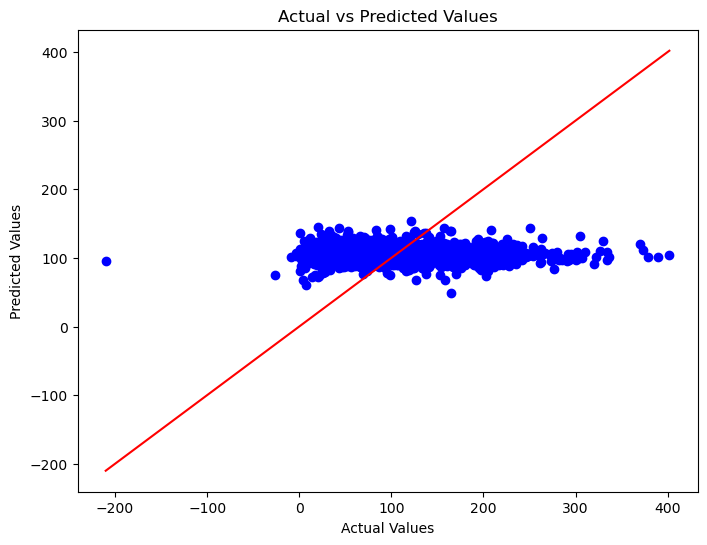

In [328]:
# Load the model
model = tf.keras.models.load_model("Models/Structure_Layers_Neurons.h5")

# Assuming you have a test dataset and corresponding labels
test_predictions = model.predict(test_dataset)

# Assuming you have test labels
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, test_predictions, color='b')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 4. Research Graph

## 4.1. Formula

In [330]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

# Load the results from the JSON file
with open('Results/FormulaResults2.json', 'r') as json_file:
    results = json.load(json_file)

# Extract the number of neurons, hidden layers, and corresponding losses
neurons = [8, 16, 32, 64, 128, 256]
hid_layers = [0, 1, 2, 3, 4, 5, 6]
losses = []

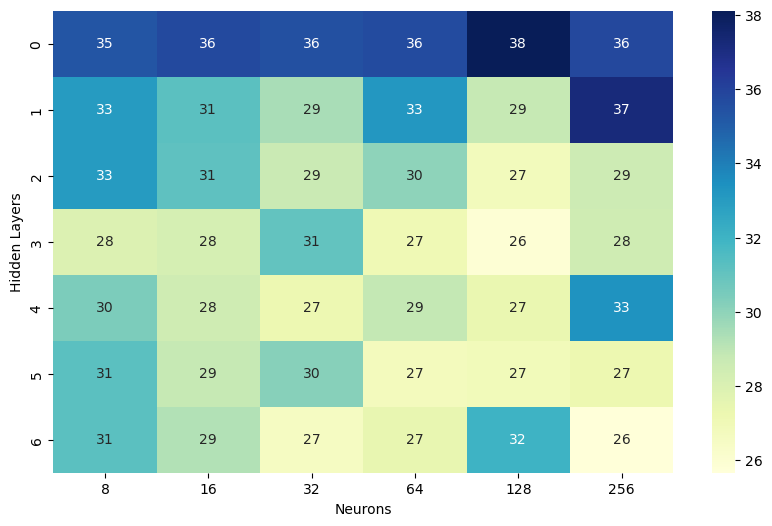

In [332]:
for num_hidden_layers in hid_layers:
    loss_row = []
    for num_neurons in neurons:
        loss = results[str(num_hidden_layers)][str(num_neurons)]
        loss_row.append(loss)
    losses.append(loss_row)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(losses, annot=True, xticklabels=neurons, yticklabels=hid_layers, cmap='YlGnBu')
plt.xlabel('Neurons')
plt.ylabel('Hidden Layers')
plt.savefig('Images/Formula_loss_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [334]:
losses = []
for num_hidden_layers in hid_layers:
    for num_neurons in neurons:
        loss = results[str(num_hidden_layers)][str(num_neurons)]
        losses.append(loss)

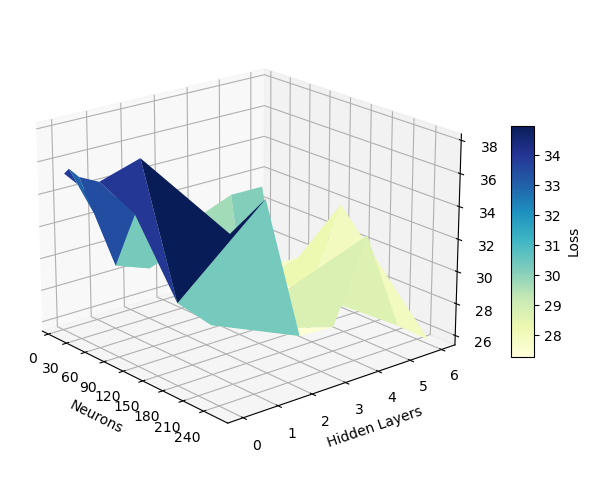

In [336]:
# Create a meshgrid for x and y
X, Y = np.meshgrid(neurons, hid_layers)

# Reshape the losses to match the dimensions of X and Y
Z = np.array(losses).reshape(X.shape)

# Create the 3D plot with better settings
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with smooth shading and color map
surf = ax.plot_surface(X, Y, Z, cmap='YlGnBu', linewidth=0, antialiased=True)

# Set axes labels and title
ax.set_xlabel('Neurons')
ax.set_ylabel('Hidden Layers')
ax.set_zlabel('')
ax.set_title('')  # Remove the title

# Set ticks and labels to be more legible
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add color bar for reference, show it to the right
color_bar = fig.colorbar(surf, shrink=0.5, aspect=10)
color_bar.set_label('Loss')

# Customize viewing angle for better presentation
ax.view_init(elev=20, azim=-40)

# Save the figure as an image file for publication
plt.savefig('Images/Formula_loss_surface.png', dpi=300, bbox_inches='tight')

# Show the plot (for visualization)
plt.show()


## 4.2. Structure